# Nestle Stock Price Prediction

# **About this Project:**

This is a Machine learning Capstone project. It is a Linear Regression problem statement.

This dataset contains information like price of shares,No. of treds,No. of shares,Deliverable Quantity,Spread High-Low,Spread Close-Open from Jan 2012 to 21st April 2022.(span- 10years)


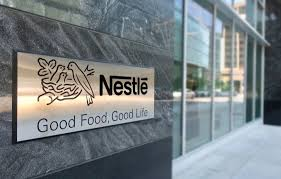

# **Problem Statment** 
Before Investing into any company an investor should study Historical stock Prices of that company , analyze the Opening-closing and High/Low Prices for better understanding of the performance of that company in share markets. Here we are predicting the Closing Price of Nestle Shares with the available Independent Features.

# What is stock?
A stock, also known as equity, is a security that represents the ownership of a fraction of the issuing corporation. Units of stock are called "shares" which entitles the owner to a proportion of the corporation's assets and profits equal to how much stock they own.


# What is stock price prediction?
Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.

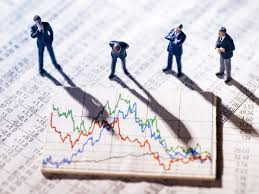

# **Data Description**

# Key Attribute of Data set:

**Date:** It shows the Date of that day and in this Data set it is uniquely define

**Open Price:** The opening price is the price from the first transaction of a business day.

**High Price:** The highest price at which a stock traded during the course of the trading day and is typically higher than the closing or equal to          the opening.

**Low Price:** The lowest price that a stock trades in that day.

**Close Price:** The closing price is the last price anyone paid for a share of that stock during the business hours of the exchange where the                 stock trades.

**WAP:** Weighted Average Price Of The Day.

**No.of Shares:** Tells us how many shares of a company are currently owned by investors.

**No. of Trades:** The total number of shares transacted between a buyer and seller during transation.

**Total Turnover (Rs.):** (It's multiplication of WAP and No.of shares in a day)Total Stock turnover is considered to be a measure of sales performance

**Deliverable Quantity:** Deliverable quantity is the total number of shares that were marked for delivery on a certain date.

**% Deli. Qty to Traded Qty :** Persentage of Deliverable Quantity's value

**Spread High-Low:** The difference between the highest price that a buyer is willing to pay for an asset and the lowest price that a seller is willing to accept.

**Spread Close-Open:** The difference between the close price that a buyer is willing to pay for an asset and the open price that a seller is willing to accept.

# Import Neccesary Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm

# **Data Preparation**

#### Read the dataset and print the first five observations.

In [2]:
# load the csv file
# store the data in 'df_nestle'
df_nestle=pd.read_csv("nestle.csv")

# display first five observations using head()
df_nestle.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,20-April-2022,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,19-April-2022,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,18-April-2022,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,13-April-2022,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000


In [3]:
# use 'shape' to check the dimension of data
df_nestle.shape

(2553, 13)

**Interpretation:** The data has 2553 observations and 13 columns.

In [4]:
# Change Column name for better understanding
df_nestle.rename(columns={'Date':'Date',
                          'Open Price':'Open_Price',
                          'High Price':'High_Price',
                          'Low Price':'Low_Price',
                          'Close Price':'Close_Price',
                          'WAP':'Weighted_Average_Price',
                          'No.of Shares':'Number_Of_Share',
                          'No. of Trades':'Number_Of_Trades',
                          'Total Turnover (Rs.)':'Total_Turnover_In_Ruppes',
                          'Deliverable Quantity':'Deliverable_Quantity',
                          '% Deli. Qty to Traded Qty':'Percentage_Of_Deliverable_Qty_To_Traded_Qty',
                          'Spread High-Low':'Spread_High_Low',
                          'Spread Close-Open':'Spread_Close_Open'},inplace=True)

In [5]:
# use 'info()' to understand the dataset and it also tells that null value are present or not 
df_nestle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         2553 non-null   object 
 1   Open_Price                                   2553 non-null   float64
 2   High_Price                                   2553 non-null   float64
 3   Low_Price                                    2553 non-null   float64
 4   Close_Price                                  2553 non-null   float64
 5   Weighted_Average_Price                       2553 non-null   float64
 6   Number_Of_Share                              2553 non-null   int64  
 7   Number_Of_Trades                             2553 non-null   int64  
 8   Total_Turnover_In_Ruppes                     2553 non-null   float64
 9   Deliverable_Quantity                         2551 non-null   float64
 10  

**Interpretation:****Interpretation:** The data have 1 categorical column and contain 4 null value that columns are Deliverable Quantity and % Deli. Qty to Traded Qty.

In [6]:
df_nestle.describe().T

,count,mean,std,min,25%,50%,75%,max
Open_Price,2553.000000,9338.023188,4940.554627,3970.000000,5391.000000,6804.000000,13299.950000,20452.000000
High_Price,2553.000000,9429.710419,4986.783271,3995.000000,5445.000000,6868.900000,13690.950000,20599.950000
Low_Price,2553.000000,9226.855934,4878.971233,3930.000000,5327.200000,6747.300000,12850.000000,20243.800000
Close_Price,2553.000000,9324.960556,4932.776537,3942.450000,5383.500000,6809.950000,13455.450000,20439.450000
Weighted_Average_Price,2553.000000,9327.503179,4929.373727,3936.768632,5385.347807,6813.150538,13387.505382,20417.372402
Number_Of_Share,2553.000000,5521.380337,10416.942384,39.000000,1572.000000,2618.000000,4981.000000,154684.000000
Number_Of_Trades,2553.000000,1004.099491,1137.547557,6.000000,442.000000,731.000000,1199.000000,20964.000000
Total_Turnover_In_Ruppes,2553.000000,47619226.422248,85028877.597759,172142.000000,11721329.000000,22220739.000000,49384650.000000,2155655355.000000
Deliverable_Quantity,2551.000000,3264.052528,8652.860793,33.000000,653.500000,1123.000000,2225.500000,152993.000000
Percentage_Of_Deliverable_Qty_To_Traded_Qty,2551.000000,49.024461,19.119739,1.270000,35.575000,46.870000,59.130000,98.930000


**Interpretation:** Statistical summary of data.

# Null Value Tretment

In [7]:
df_nestle.isnull().sum()*100/len(df_nestle)

Date                                          0.000000
Open_Price                                    0.000000
High_Price                                    0.000000
Low_Price                                     0.000000
Close_Price                                   0.000000
Weighted_Average_Price                        0.000000
Number_Of_Share                               0.000000
Number_Of_Trades                              0.000000
Total_Turnover_In_Ruppes                      0.000000
Deliverable_Quantity                          0.078339
Percentage_Of_Deliverable_Qty_To_Traded_Qty   0.078339
Spread_High_Low                               0.000000
Spread_Close_Open                             0.000000
dtype: float64

In [8]:
#Drop null value
df_nestle.dropna(inplace=True)
# after drop value check shape
df_nestle.shape

(2551, 13)

**Interpretation:**Here 0.2% Null value so, we drop null value.

# (Exploratory Data Analysis) EDA

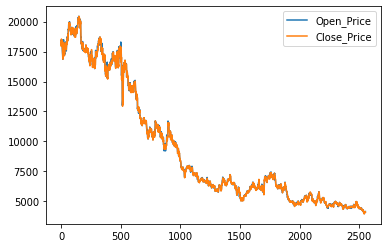

In [9]:
plt.plot('Open_Price',data=df_nestle,)
plt.plot('Close_Price',data=df_nestle)
plt.legend()

 **Interpretation:** Here we see that open price and close price have not too much difference

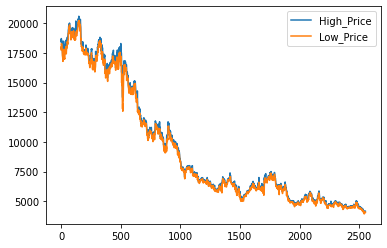

In [10]:
plt.plot('High_Price',data=df_nestle)
plt.plot('Low_Price',data=df_nestle)
plt.legend()

**Interpretation:** Here we see that high price and low price have not too much difference

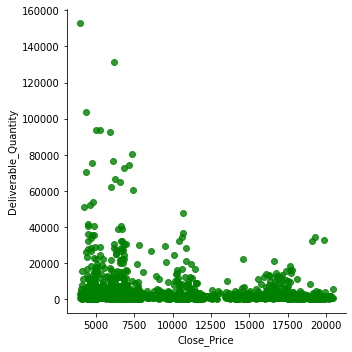

In [11]:
sns.lmplot(x='Close_Price',y='Deliverable_Quantity',scatter_kws={'color':'green'},line_kws={'color':'green'},data=df_nestle)

**Interpretation:** Here we see that when close price is small that time Deliverable_Quantity is high.

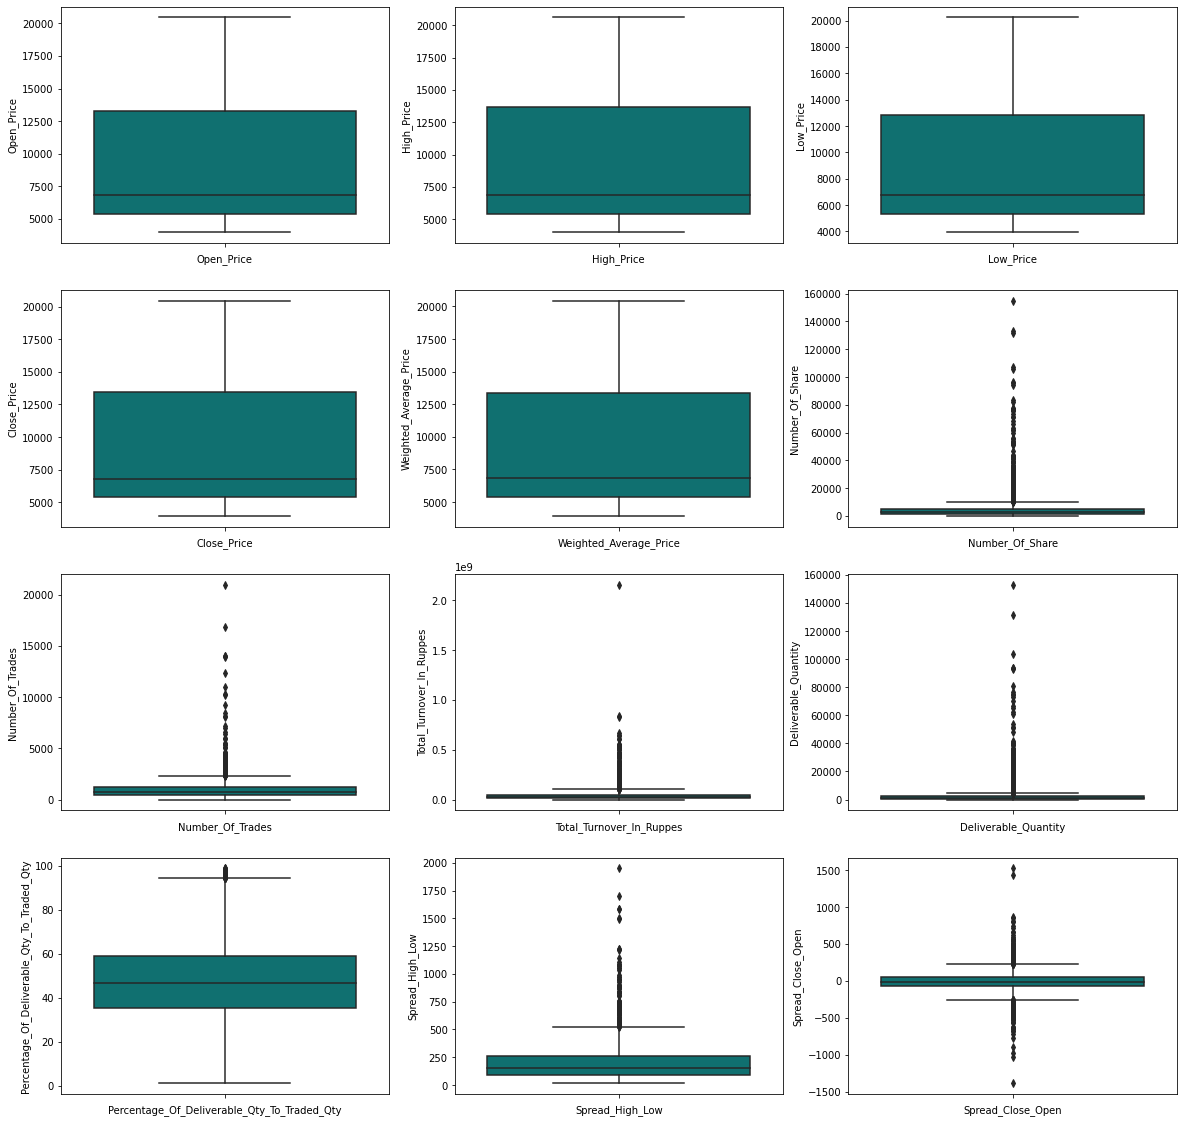

In [12]:
# using boxplot graph we check outlier
df_num = df_nestle.select_dtypes(include=[np.number])
fig, ax = plt.subplots(4,3, figsize=(20, 20))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(y= df_num[variable], orient = "h", whis=1.5 ,ax=subplot,color='teal') 
    z.set_xlabel(variable, fontsize = 10)                                     

**Interpretation:** Here we see that Number_Of_Share ,Number_Of_Trades Total_Turnover_in_Ruppes
,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty ,
Spread_High_Low ,Spread_Close_open have Outlier

**Interpretation:**In Stock market data, price is high and low so, we not perform outlier treatment.

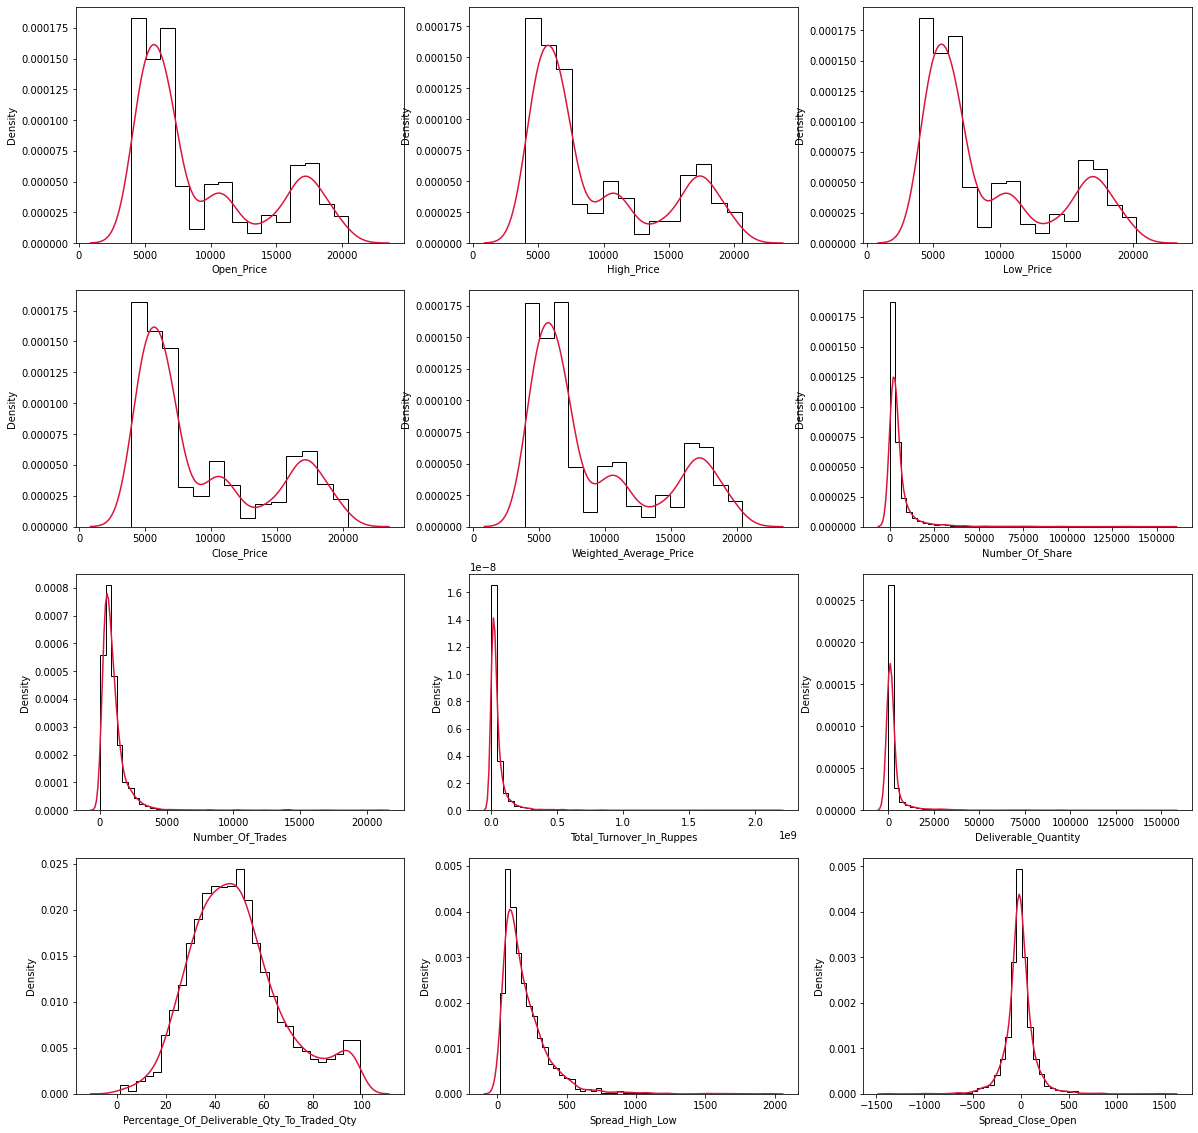

In [13]:
num_col=[col for col in df_nestle.columns if df_nestle[col].dtype!='object']
plt.figure(figsize=(20,20))
plotnumber=1
for column in num_col:
      if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_nestle[column],color='crimson',hist_kws={'histtype':'step','linewidth':1,'alpha':1,'color':'k'})
        plt.xlabel(column)
      plotnumber+=1

In [14]:
df_nestle.skew()

Open_Price                                    0.838943
High_Price                                    0.834516
Low_Price                                     0.841663
Close_Price                                   0.837990
Weighted_Average_Price                        0.836785
Number_Of_Share                               6.503484
Number_Of_Trades                              7.154183
Total_Turnover_In_Ruppes                      8.950938
Deliverable_Quantity                          8.153823
Percentage_Of_Deliverable_Qty_To_Traded_Qty   0.602990
Spread_High_Low                               2.959270
Spread_Close_Open                             0.397781
dtype: float64

**Interpretation:**Here we see that Spread_Close_Open is Normally distributed and Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity are positively skewed i.e. mostly all number are increase and mean>median>mode.

<AxesSubplot:>

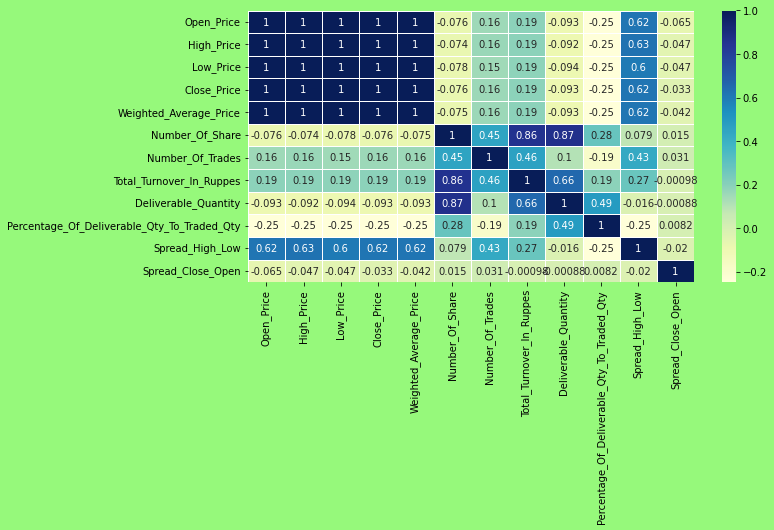

In [15]:
plt.figure(figsize=(10,5),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(df_nestle.corr(),cmap='YlGnBu',linewidths=.5,annot=True)


**Interpretation:** Target Variable Close_price have more correation with open,high,low,WAP

# Feature Extraction

In [10]:
# date column contain unique value so, not give any information i.e we extract further into day,month and year

# 1st convert datatype object to datetime 
df_nestle['Date']=pd.to_datetime(df_nestle['Date'])

# Divide into Day,Month,Year
df_nestle['Day']=df_nestle['Date'].dt.weekday
df_nestle['Month']=df_nestle['Date'].dt.month
df_nestle['Year']=df_nestle['Date'].dt.year


In [11]:
# add new column is seasons
Season=[]
for i in df_nestle['Month']:
    if i==12 or i==1:
        Season.append('winter')

    elif i==2 or i==3:
        Season.append('Spring')

    elif i>=4 and i<=6:
        Season.append('Summer')

    elif i>=7 and i<=9:
        Season.append('Monsoon')
    else:
         Season.append('Autumn')
df_nestle['Season']=Season

In [12]:
df_nestle.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year,Season
0,2022-04-21,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,3,4,2022,Summer
1,2022-04-20,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,2,4,2022,Summer
2,2022-04-19,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,1,4,2022,Summer
3,2022-04-18,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,0,4,2022,Summer
4,2022-04-13,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,2,4,2022,Summer


In [13]:
#Then we drop Date column to copy dataframe
df_nestle_fea=df_nestle.copy()
df_nestle_fea.drop('Date',axis=1,inplace=True)

In [14]:
# Give name to the days
df_nestle_new=df_nestle_fea.copy()
Days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_nestle_new['Day']=df_nestle_new['Day'].map(Days)
df_nestle_new.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year,Season
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,Thursday,4,2022,Summer
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,Wednesday,4,2022,Summer
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,Tuesday,4,2022,Summer
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,Monday,4,2022,Summer
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,Wednesday,4,2022,Summer


In [15]:
# Give name to the month
month={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Auguest',9:'September',
      10:'October',11:'November',12:'December'}
df_nestle_new['Month']=df_nestle_new['Month'].map(month)
df_nestle_new.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year,Season
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,Thursday,April,2022,Summer
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,Wednesday,April,2022,Summer
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,Tuesday,April,2022,Summer
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,Monday,April,2022,Summer
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,Wednesday,April,2022,Summer


In [16]:
y=df_nestle_new.groupby('Year')['Close_Price'].sum()
y

Year
2012   1139505.250000
2013   1258109.850000
2014   1315753.900000
2015   1600729.900000
2016   1511218.000000
2017   1681698.700000
2018   2317396.050000
2019   2975752.200000
2020   4152809.650000
2021   4497326.300000
2022   1331620.350000
Name: Close_Price, dtype: float64

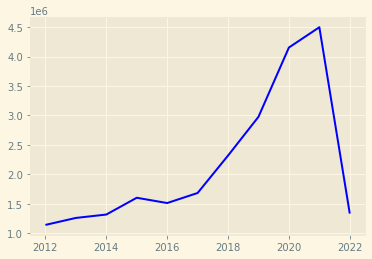

In [16]:
plt.style.use("Solarize_Light2")
plt.plot(y,color='b')

**Interpretation:**In year 2021 close price is high,and in 2015 maggi banned that why deacrese market 2015-2016.

<AxesSubplot:xlabel='Year', ylabel='Number_Of_Trades'>

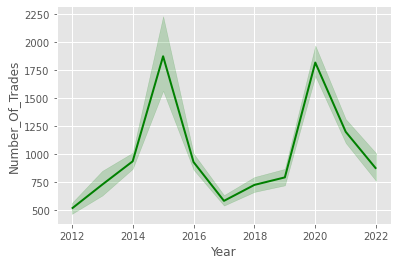

In [27]:
plt.style.use("ggplot")
sns.lineplot(x='Year',y='Number_Of_Trades',data=df_nestle_new,color='g')

**Interpretation:** In year 2015 and 2020 No.of trades high i.e. Intraday happen more.

<AxesSubplot:xlabel='Month', ylabel='Close_Price'>

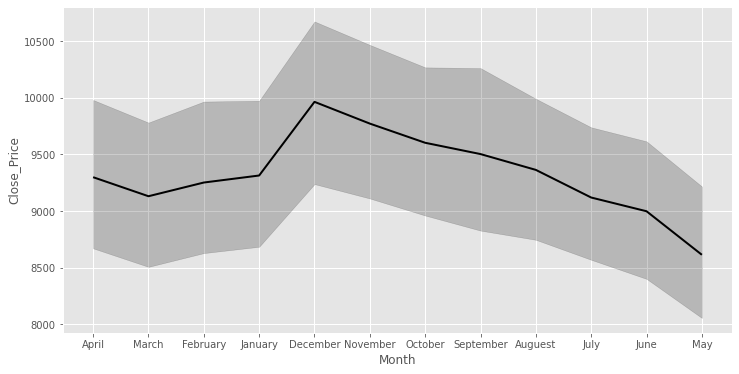

In [28]:
plt.style.use("seaborn-bright")
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Close_Price',data=df_nestle_new,color='k')

**Interpretation:**In month 12 close price is high and also we see that after month 6 price is increase.

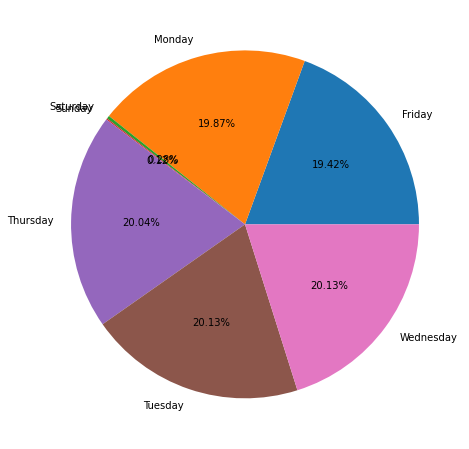

In [17]:
df_day=df_nestle_new.groupby('Day')['Close_Price'].sum().reset_index()
plt.figure(figsize=(10,8))
plt.pie(df_day['Close_Price'],labels=df_day['Day'],autopct='%1.2f%%')
plt.show()

**Interpretation:** Here we see that saturday and sunday market is close so value is low and Tuesday,Wednesday,Thursday
stock close price are more

# Forecasting for period of 1 year

In [17]:
df_nestle['Date']=pd.to_datetime(df_nestle['Date'])
df_forecast=df_nestle[['Date','Close_Price']]
df_forecast.rename(columns={'Date':'ds','Close_Price':'y'},inplace=True)
df_forecast.head()

,ds,y
0,2022-04-21,18205.800000
1,2022-04-20,18313.700000
2,2022-04-19,17943.150000
3,2022-04-18,18549.850000
4,2022-04-13,18343.900000


In [18]:
import prophet #for time series forcasting
from prophet import Prophet
m=Prophet()
m.fit(df_forecast)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast.head()

01:45:44 - cmdstanpy - INFO - Chain [1] start processing
01:45:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-02,4523.413801,3942.133755,5248.538007,4523.413801,4523.413801,74.115644,74.115644,74.115644,-107.274801,-107.274801,-107.274801,181.390445,181.390445,181.390445,0.000000,0.000000,0.000000,4597.529445
1,2012-01-03,4524.257887,3990.901515,5216.169871,4524.257887,4524.257887,73.069639,73.069639,73.069639,-101.314396,-101.314396,-101.314396,174.384035,174.384035,174.384035,0.000000,0.000000,0.000000,4597.327526
2,2012-01-04,4525.101973,3949.209554,5204.087311,4525.101973,4525.101973,69.702503,69.702503,69.702503,-97.791414,-97.791414,-97.791414,167.493917,167.493917,167.493917,0.000000,0.000000,0.000000,4594.804476
3,2012-01-05,4525.946059,3964.238124,5223.363352,4525.946059,4525.946059,74.925674,74.925674,74.925674,-85.873692,-85.873692,-85.873692,160.799366,160.799366,160.799366,0.000000,0.000000,0.000000,4600.871733
4,2012-01-06,4526.790146,3923.407058,5220.901839,4526.790146,4526.790146,57.042989,57.042989,57.042989,-97.319958,-97.319958,-97.319958,154.362947,154.362947,154.362947,0.000000,0.000000,0.000000,4583.833134


In [19]:
#pip install autots #forcasting library

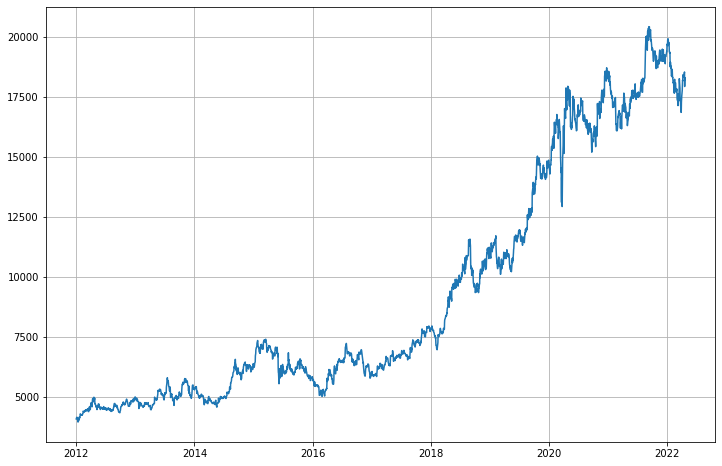

In [20]:
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(1,1,1)
plt.grid()
ax.plot(df_nestle.Date,df_nestle.Close_Price)

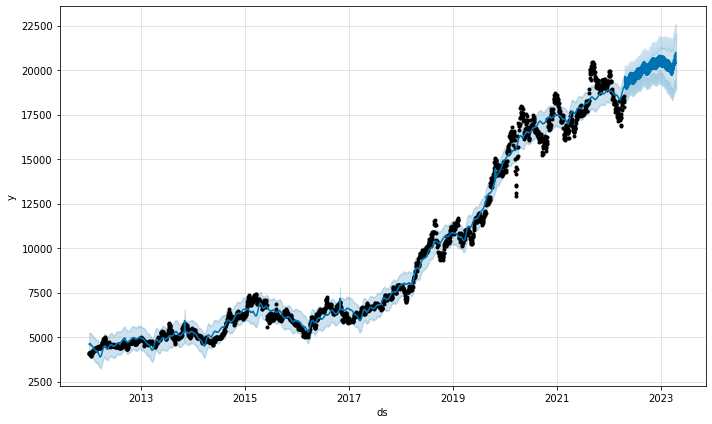

In [21]:
fig=m.plot(forecast)

**Interpretation:** Here we see that after forcasting,in year 2023 close price is increases so, it's benifit to take stock.

# Filter numerical and categorical variables

In [22]:
#Target Variable
df_target=df_nestle_fea['Close_Price']

#Numeric variable
df_feature=df_nestle_fea.select_dtypes(include=['number'])

#Drop Target Variable
df_feature=df_feature.drop("Close_Price",axis=1)

#Categorical variable
df_cat=df_nestle_fea.select_dtypes(include=['object'])

# Scale Data

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scalled = ss.fit_transform(df_feature)
df_scale=pd.DataFrame(scalled,columns=df_feature.columns)
df_scale.head()

,Open_Price,High_Price,Low_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,1.784804,1.834689,1.752755,1.786903,-0.089483,0.673071,0.418534,-0.267485,-1.481716,3.413743,0.436242,0.698321,-0.684029,1.792207
1,1.774700,1.803002,1.802836,1.820465,0.052472,0.278437,0.745633,0.163325,1.466601,1.114947,1.435815,-0.003854,-0.684029,1.792207
2,1.849610,1.863787,1.767661,1.832547,-0.251306,-0.253307,0.066789,-0.190154,0.351828,3.827263,-3.254831,-0.706028,-0.684029,1.792207
3,1.814063,1.857066,1.859704,1.864232,-0.386447,-0.367566,-0.234349,-0.312912,-0.616994,1.070080,1.700278,-1.408203,-0.684029,1.792207
4,1.829594,1.829944,1.850221,1.839421,-0.419656,-0.399207,-0.311314,-0.311062,0.042140,0.561681,-0.090149,-0.003854,-0.684029,1.792207


# Encode Data

In [24]:
#convert data categorical to numeric
encoded_data = pd.get_dummies(data = df_cat, drop_first=True).reset_index(drop=True)
encoded_data.head()

,Season_Monsoon,Season_Spring,Season_Summer,Season_winter
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [25]:
#concate data
df_nestle_dummy = pd.concat([df_scale, encoded_data], axis=1).reset_index(drop=True)

## display first five observations
df_nestle_dummy.head()

,Open_Price,High_Price,Low_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year,Season_Monsoon,Season_Spring,Season_Summer,Season_winter
0,1.784804,1.834689,1.752755,1.786903,-0.089483,0.673071,0.418534,-0.267485,-1.481716,3.413743,0.436242,0.698321,-0.684029,1.792207,0,0,1,0
1,1.774700,1.803002,1.802836,1.820465,0.052472,0.278437,0.745633,0.163325,1.466601,1.114947,1.435815,-0.003854,-0.684029,1.792207,0,0,1,0
2,1.849610,1.863787,1.767661,1.832547,-0.251306,-0.253307,0.066789,-0.190154,0.351828,3.827263,-3.254831,-0.706028,-0.684029,1.792207,0,0,1,0
3,1.814063,1.857066,1.859704,1.864232,-0.386447,-0.367566,-0.234349,-0.312912,-0.616994,1.070080,1.700278,-1.408203,-0.684029,1.792207,0,0,1,0
4,1.829594,1.829944,1.850221,1.839421,-0.419656,-0.399207,-0.311314,-0.311062,0.042140,0.561681,-0.090149,-0.003854,-0.684029,1.792207,0,0,1,0


# Train Test Split

In [26]:
X_full = df_nestle_dummy.copy()

y_full = df_target.copy()

X_full = sm.add_constant(X_full)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (1785, 19)
y_train_full (1785,)
X_test_full (766, 19)
y_test_full (766,)


**Interpretation:** Here we split data in 70% and 30% ratio.

In [27]:
# after split not come error that why we reset index
X_train_full=X_train_full.reset_index(drop=True)
y_train_full=y_train_full.reset_index(drop=True)
X_test_full=X_test_full.reset_index(drop=True)
y_test_full=y_test_full.reset_index(drop=True)

# Make Base Model

In [28]:
MLR_base_model=sm.OLS(y_train_full,X_train_full).fit()
print(MLR_base_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Close_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.266e+30
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:46:05   Log-Likelihood:                 39987.
No. Observations:                1785   AIC:                        -7.994e+04
Df Residuals:                    1767   BIC:                        -7.984e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

**Interpretation:** Rsquared is a score of variation present in a target variable explain by independent variable

# Model Evaluation

In [29]:
# R_Squerd
print("Base Model evolution")

x = MLR_base_model.rsquared
print("R Squared = ",x)
print("here in our case",x,"percent target veriable explain by Indepandant veriable")
print("----------------------------------------------------------------------------------")

# Ad_R_squared
y = MLR_base_model.rsquared_adj
print("adj R Squared = ",y)
print("here in our case",y,"percent target values explain by Indepandant veriable")
print("-----------------------------------------------------------------------------------")

# Condition No
z = MLR_base_model.condition_number
print("Condition Number",z)
print("Here in our case condition number is",z,"so the Severe Multicollinearity is present in the data")
print("-----------------------------------------------------------------------------------")

# Durbin Watson
# take it manually
a = 1.971
print("durbin Watson",a)
print("Here in our case Durbin watson score is",a,"so it meanse there is no autocorrelation")

Base Model evolution
R Squared =  1.0
here in our case 1.0 percent target veriable explain by Indepandant veriable
----------------------------------------------------------------------------------
adj R Squared =  1.0
here in our case 1.0 percent target values explain by Indepandant veriable
-----------------------------------------------------------------------------------
Condition Number 7567998380347935.0
Here in our case condition number is 7567998380347935.0 so the Severe Multicollinearity is present in the data
-----------------------------------------------------------------------------------
durbin Watson 1.971
Here in our case Durbin watson score is 1.971 so it meanse there is no autocorrelation


# Model performance

In [30]:
#training data
train_predict=MLR_base_model.predict(X_train_full)
train_predict.head()

#testing data
test_predict=MLR_base_model.predict(X_test_full)
test_predict.head()

0   10521.050000
1   16374.150000
2    5152.700000
3    9810.400000
4    7194.800000
dtype: float64

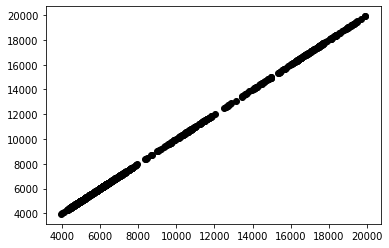

In [31]:
plt.scatter(y_test_full,test_predict,color='k')

**Interpretation:** Predict value of X_train_full and X_test_full.

In [32]:
#for train data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_train_full,train_predict)
print("Mean Absolute Error is",MAE)
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train_full,train_predict)
print("Mean squared Error is",MSE)
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is",RMSE)
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 4.130354272110351e-11
-----------------------------------------------------------------------------------

Mean squared Error is 2.039861103379051e-21
-----------------------------------------------------------------------------------

Root Mean Squared Error is 4.5164821524933e-11
-----------------------------------------------------------------------------------



**Interpretation:** Here we see that in train data error are zero.

In [33]:
#for test data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test_full,test_predict)
print("Mean Absolute Error is",MAE)
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_full,test_predict)
print("Mean Squared Error is",MSE)
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is", RMSE)
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 3.977377058399535e-11
-----------------------------------------------------------------------------------

Mean Squared Error is 1.9017316930370283e-21
-----------------------------------------------------------------------------------

Root Mean Squared Error is 4.360884879284281e-11
-----------------------------------------------------------------------------------



**Interpretation:** Here we see that in test data error are zero. Train and test both data error is zero i.e. overfitting or underfitting not happen and model is accurately predicted but we face **multicolinearity problem** so we use vif.

# VIF (Variance Inflation Factor)

In [34]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_numeric=X_full
df_numeric.shape
#find the feature importance using vif
for ind in range(len(df_numeric.columns)):
    #make new dataframe for vif
    vif=pd.DataFrame()
    #find vif
    vif['vif_factor']=[variance_inflation_factor(df_numeric.values,i) for i in range(df_numeric.shape[1])]
    vif['features']=df_numeric.columns
    #set the thresold for vif(higher the vif-less contribution,less vif-higher contribution)
    multi=vif[vif['vif_factor']>10]
    #sort the vif in desecnding order
    if (multi.empty==False):
        df_sorted=multi.sort_values(by='vif_factor',ascending=False)
    
    else:
        print(vif)
        break
        #drop those column present in df_sorted from df_numeric
    if(df_sorted.empty==False):
        df_numeric=df_numeric.drop(df_sorted.features.iloc[0],axis=1)
    else:
        print(vif)
#now we can use only these columns and drop remaining

    vif_factor                                     features
0     9.327457                                        const
1     7.101883                       Weighted_Average_Price
2     1.708584                             Number_Of_Trades
3     2.685765                     Total_Turnover_In_Ruppes
4     2.486633                         Deliverable_Quantity
5     1.586145  Percentage_Of_Deliverable_Qty_To_Traded_Qty
6     2.022095                              Spread_High_Low
7     1.006135                            Spread_Close_Open
8     1.004359                                          Day
9     2.164178                                        Month
10    6.652724                                         Year
11    2.145095                               Season_Monsoon
12    3.348246                                Season_Spring
13    2.919395                                Season_Summer
14    2.229770                                Season_winter


In [35]:
#model
x_model=df_numeric[['const','Weighted_Average_Price','Number_Of_Trades','Total_Turnover_In_Ruppes','Deliverable_Quantity','Percentage_Of_Deliverable_Qty_To_Traded_Qty','Spread_High_Low','Spread_Close_Open','Day','Month','Year','Season_Monsoon','Season_Spring','Season_Summer','Season_winter']]
x_model.head()

,const,Weighted_Average_Price,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year,Season_Monsoon,Season_Spring,Season_Summer,Season_winter
0,1.000000,1.786903,0.673071,0.418534,-0.267485,-1.481716,3.413743,0.436242,0.698321,-0.684029,1.792207,0,0,1,0
1,1.000000,1.820465,0.278437,0.745633,0.163325,1.466601,1.114947,1.435815,-0.003854,-0.684029,1.792207,0,0,1,0
2,1.000000,1.832547,-0.253307,0.066789,-0.190154,0.351828,3.827263,-3.254831,-0.706028,-0.684029,1.792207,0,0,1,0
3,1.000000,1.864232,-0.367566,-0.234349,-0.312912,-0.616994,1.070080,1.700278,-1.408203,-0.684029,1.792207,0,0,1,0
4,1.000000,1.839421,-0.399207,-0.311314,-0.311062,0.042140,0.561681,-0.090149,-0.003854,-0.684029,1.792207,0,0,1,0


# Train test split after applying VIF

In [36]:
y_full = df_target.copy()

x_model= sm.add_constant(x_model)
X_train_vif, X_test_vif, y_train_full, y_test_full = train_test_split(x_model, y_full, random_state=1, test_size = 0.3)

print('X_train_vif', X_train_vif.shape)
print('y_train_full', y_train_full.shape)

print('X_test_vif', X_test_vif.shape)
print('y_test_full', y_test_full.shape)

X_train_vif (1785, 15)
y_train_full (1785,)
X_test_vif (766, 15)
y_test_full (766,)


In [37]:
# after split not come error that why we reset index
X_train_vif=X_train_vif.reset_index(drop=True)
y_train_full=y_train_full.reset_index(drop=True)
X_test_vif=X_test_vif.reset_index(drop=True)
y_test_full=y_test_full.reset_index(drop=True)

# Make base model after VIF

In [38]:
MLR_base_model_vif=sm.OLS(y_train_full,X_train_vif).fit()
print(MLR_base_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:            Close_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.886e+06
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:46:10   Log-Likelihood:                -9153.3
No. Observations:                1785   AIC:                         1.834e+04
Df Residuals:                    1770   BIC:                         1.842e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

# Model Evaluation after VIF

In [39]:
# R_Squerd
print("Base Model evolution")

x = MLR_base_model_vif.rsquared
print("R Squared = ",x)
print("here in our case",x,"percent target veriable explain by Indepandant veriable")
print("----------------------------------------------------------------------------------")

# Ad_R_squared
y = MLR_base_model_vif.rsquared_adj
print("adj R Squared = ",y)
print("here in our case",y,"percent target values explain by Indepandant veriable")
print("-----------------------------------------------------------------------------------")

# Condition No
z = MLR_base_model_vif.condition_number
print("Condition Number",z)
print("Here in our case condition number is",z,"so the Severe Multicollinearity is not present in the data")
print("-----------------------------------------------------------------------------------")

# Durbin Watson
# take it manually
a = 2.059
print("durbin Watson",a)
print("Here in our case Durbin watson score is",a,"so it meanse there is no autocorrelation")

Base Model evolution
R Squared =  0.9999329522807537
here in our case 0.9999329522807537 percent target veriable explain by Indepandant veriable
----------------------------------------------------------------------------------
adj R Squared =  0.9999324219598106
here in our case 0.9999324219598106 percent target values explain by Indepandant veriable
-----------------------------------------------------------------------------------
Condition Number 12.841805530759027
Here in our case condition number is 12.841805530759027 so the Severe Multicollinearity is not present in the data
-----------------------------------------------------------------------------------
durbin Watson 2.059
Here in our case Durbin watson score is 2.059 so it meanse there is no autocorrelation


# Model Performance after VIF

In [40]:
#training data
train_predict=MLR_base_model_vif.predict(X_train_vif)

#testing data
test_predict=MLR_base_model_vif.predict(X_test_vif)


**Interpretation:** Predict Train and test value

In [41]:
#for train data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_train_full,train_predict)
print("Mean Absolute Error is",MAE)
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train_full,train_predict)
print("Mean squared Error is",MSE)
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is",RMSE)
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 25.943433448726267
-----------------------------------------------------------------------------------

Mean squared Error is 1665.6154189523158
-----------------------------------------------------------------------------------

Root Mean Squared Error is 40.811951913040325
-----------------------------------------------------------------------------------



In [42]:
#for test data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test_full,test_predict)
print("Mean Absolute Error is",MAE)
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_full,test_predict)
print("Mean Squared Error is",MSE)
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is", RMSE)
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 27.79132191399982
-----------------------------------------------------------------------------------

Mean Squared Error is 1859.5684344066
-----------------------------------------------------------------------------------

Root Mean Squared Error is 43.12271367164409
-----------------------------------------------------------------------------------



**Interpretation:** Train and test both RMSE value mostly same i.e model is not overfitting.

# Final Model

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train_vif,y_train_full) 
print("Train data accuracy",lr_model.score(X_train_vif,y_train_full))
print("Test data accuracy",lr_model.score(X_test_vif,y_test_full))

Train data accuracy 0.9999329522807537
Test data accuracy 0.999919427954808


In [44]:
# Predict value of x test
y_pred=lr.predict(X_test_vif)
lr_new=pd.DataFrame({'Actual Value':y_test_full,'Predicted_value':y_pred})
lr_new.head()

,Actual Value,Predicted_value
0,10521.050000,10399.435484
1,16374.150000,16307.092852
2,5152.700000,5150.033828
3,9810.400000,9839.873626
4,7194.800000,7209.810819


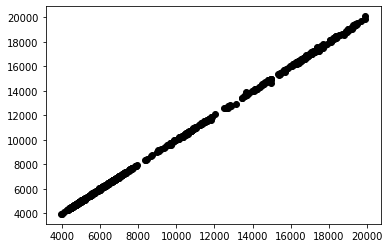

In [45]:
plt.scatter(y_test_full,y_pred,color='k')

# Model Performance

In [46]:
from sklearn.metrics import r2_score
print("R-score",r2_score(y_test_full,y_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_full,y_pred))

RMSE = np.sqrt(MSE)
print("RMSE",RMSE)

R-score 0.999919427954808
MSE 1859.5684344066349
RMSE 43.12271367164409


# Desicion Tree

In [47]:
# Train test split
X_full = df_nestle_dummy.copy()

y_full = df_target.copy()

X_full = sm.add_constant(X_full)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

# after split not come error that why we reset index
X_train_vif=X_train_vif.reset_index(drop=True)
y_train_full=y_train_full.reset_index(drop=True)
X_test_vif=X_test_vif.reset_index(drop=True)
y_test_full=y_test_full.reset_index(drop=True)

X_train_full (1785, 19)
y_train_full (1785,)
X_test_full (766, 19)
y_test_full (766,)


In [48]:
# make model
from sklearn.tree import DecisionTreeRegressor
desicion_tree=DecisionTreeRegressor(criterion='mse',random_state=10)
decision_model=desicion_tree.fit(X_train_full,y_train_full)

In [49]:
#predict  x_train value
predict_train=decision_model.predict(X_train_full)

#predict x_test value
predict_test=decision_model.predict(X_test_full)

In [50]:
#check for test data
desicion_tree.score(X_test_full,y_test_full)

0.9996976005256172

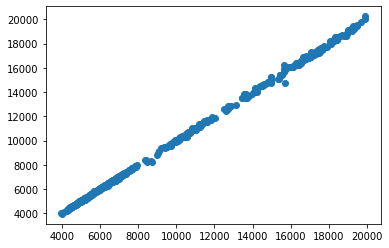

In [51]:
plt.scatter(y_test_full,predict_test)

In [52]:
#from sklearn.tree import export_graphviz
#export_graphviz(desicion_tree)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor(n_estimators=10,criterion='mse',random_state=10)
rf_model=rf_regressor.fit(X_train_full,y_train_full)

In [54]:
#predict  x_train value
predict_train=rf_regressor.predict(X_train_full)

#predict x_test value
predict_test=rf_regressor.predict(X_test_full)

In [55]:
#check for test data
rf_regressor.score(X_test_full,y_test_full)

0.9998116209745624

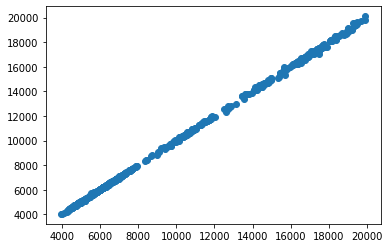

In [57]:
plt.scatter(y_test_full,predict_test)

# Conclusion

After performing Data visulization and forecasting analysis we conclude that it's benift to buy nestle share.
- Build model using Linear Regression,Decision Tree and Random Forest and
- Model is accurartly predict close price so, it's benift to any company that predict close price and make profit.